In [122]:
import numpy as np
import pandas as pd
import os

In [123]:
df = pd.read_csv("data.csv")
df.shape

(4599, 18)

In [124]:
df.dtypes

Date              object
Price            float64
Bedrooms           int64
Bathrooms          int64
Sqft_Living        int64
Sqft_Lot           int64
Floors           float64
Waterfront         int64
View               int64
Condition          int64
Sqft_Above         int64
Sqft_Basement      int64
Yr_Built           int64
Yr_Renovated       int64
Street            object
City              object
Statezip          object
Country           object
dtype: object

In [125]:
df.head(8)

,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Street,City,Statezip,Country
0,2/5/2014,313000.0,3,2,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2/5/2014,2384000.0,5,3,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2/5/2014,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2/5/2014,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2/5/2014,550000.0,4,3,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2/5/2014,490000.0,2,1,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2/5/2014,335000.0,2,2,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2/5/2014,482000.0,4,3,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA


In [126]:
df.describe()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated
count,4.599000e+03,4599.000000,4599.000000,4599.000000,4.599000e+03,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,5.518547e+05,3.400739,2.363557,2139.177212,1.485418e+04,1.512177,0.007175,0.240052,3.451837,1827.343118,311.834094,1970.797130,808.347902
std,5.638482e+05,0.908904,0.875222,963.242841,3.588816e+04,0.538294,0.084413,0.777425,0.677271,862.246626,463.884192,29.726013,979.361818
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.227500e+05,3.000000,2.000000,1460.000000,5.000500e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.608869e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.544750e+05,4.000000,3.000000,2620.000000,1.100250e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [127]:
Categorical = df.dtypes[df.dtypes == "object"].index
print(Categorical)

df[Categorical].describe()

Index(['Date', 'Street', 'City', 'Statezip', 'Country'], dtype='object')


,Date,Street,City,Statezip,Country
count,4599,4599,4599,4599,4599
unique,70,4524,44,77,1
top,23/6/2014,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1572,148,4599


In [128]:
Categorical = df.dtypes[df.dtypes == "int64"].index
print(Categorical)

df[Categorical].describe()

Index(['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Waterfront',
       'View', 'Condition', 'Sqft_Above', 'Sqft_Basement', 'Yr_Built',
       'Yr_Renovated'],
      dtype='object')


,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated
count,4599.000000,4599.000000,4599.000000,4.599000e+03,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,3.400739,2.363557,2139.177212,1.485418e+04,0.007175,0.240052,3.451837,1827.343118,311.834094,1970.797130,808.347902
std,0.908904,0.875222,963.242841,3.588816e+04,0.084413,0.777425,0.677271,862.246626,463.884192,29.726013,979.361818
min,0.000000,0.000000,370.000000,6.380000e+02,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.000000,2.000000,1460.000000,5.000500e+03,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,3.000000,2.000000,1980.000000,7.683000e+03,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,4.000000,3.000000,2620.000000,1.100250e+04,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,9.000000,8.000000,13540.000000,1.074218e+06,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [129]:
del df["Street"]

In [130]:
sorted(df["Bedrooms"])[0:15]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [131]:
df["Bedrooms"].describe()

count    4599.000000
mean        3.400739
std         0.908904
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Bedrooms, dtype: float64

In [132]:
df["Bedrooms"][0:15]

0     3
1     5
2     3
3     3
4     4
5     2
6     2
7     4
8     3
9     4
10    3
11    4
12    3
13    3
14    5
Name: Bedrooms, dtype: int64

In [133]:
df["Yr_Built"][0:15]

0     1955
1     1921
2     1966
3     1963
4     1976
5     1938
6     1976
7     1989
8     1985
9     1945
10    1948
11    1909
12    1980
13    1955
14    1939
Name: Yr_Built, dtype: int64

In [134]:
df["Yr_Built"].describe()

count    4599.000000
mean     1970.797130
std        29.726013
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: Yr_Built, dtype: float64

In [135]:
sorted(df["Yr_Built"])[0:15]

[1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900]

In [136]:
df["Yr_Renovated"][0:15]

0     2005
1        0
2        0
3        0
4     1992
5     1994
6        0
7        0
8        0
9     2010
10    1994
11    1988
12       0
13    2009
14    1969
Name: Yr_Renovated, dtype: int64

In [137]:
df["Yr_Renovated"].describe()

count    4599.000000
mean      808.347902
std       979.361818
min         0.000000
25%         0.000000
50%         0.000000
75%      1999.000000
max      2014.000000
Name: Yr_Renovated, dtype: float64

In [138]:
new_surv = pd.Categorical(df["Waterfront"])
new_surv = new_surv.rename_categories(["View","Waterfront"])

new_surv.describe()

,counts,freqs
categories,,
View,4566,0.992825
Waterfront,33,0.007175


In [139]:
df["Bedrooms"].unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0], dtype=int64)

In [140]:
char_Bedrooms = df["Bedrooms"].astype(str)

new_Bedrooms = np.array([Bedrooms[0] for Bedrooms in char_Bedrooms])
new_Bedrooms = pd.Categorical(new_Bedrooms)

new_Bedrooms.describe()

,counts,freqs
categories,,
0,2,0.000435
1,38,0.008263
2,566,0.123070
3,2032,0.441835
4,1530,0.332681
5,353,0.076756
6,61,0.013264
7,14,0.003044
8,2,0.000435


In [141]:
df["Bedrooms"] = new_Bedrooms

In [142]:
df

,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,City,Statezip,Country
0,2/5/2014,3.130000e+05,3,2,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2/5/2014,2.384000e+06,5,3,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,2/5/2014,3.420000e+05,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,2/5/2014,4.200000e+05,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,2/5/2014,5.500000e+05,4,3,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,9/7/2014,3.081667e+05,3,2,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,USA
4595,9/7/2014,5.343333e+05,3,3,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,USA
4596,9/7/2014,4.169042e+05,3,3,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,USA
4597,10/7/2014,2.034000e+05,4,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,USA


In [143]:
dum_vec = pd.Series([1,None,3,None,7,9])

dum_vec.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [144]:
df["Bathrooms"].describe()

count    4599.000000
mean        2.363557
std         0.875222
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Bathrooms, dtype: float64

In [145]:
miss = np.where(df["Bathrooms"].isnull()==True)
miss

(array([], dtype=int64),)

In [146]:
len(miss[0])

0

array([[<AxesSubplot:title={'center':'Bathrooms'}>]], dtype=object)

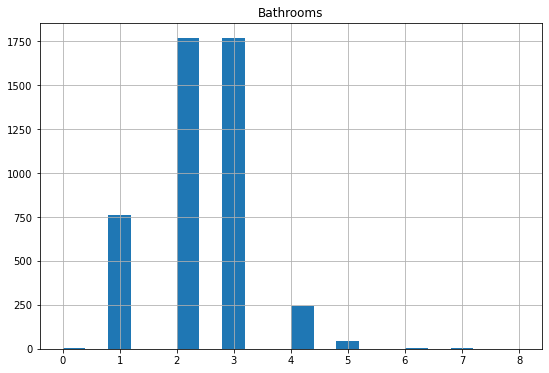

In [147]:
df.hist(column = "Bathrooms",figsize=(9,6),bins=20)

In [148]:
nav = np.where(df["Bathrooms"].isnull(),25,df["Bathrooms"])

df["Bathrooms"] = nav
df["Bathrooms"].describe()

count    4599.000000
mean        2.363557
std         0.875222
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Bathrooms, dtype: float64

array([[<AxesSubplot:title={'center':'Bathrooms'}>]], dtype=object)

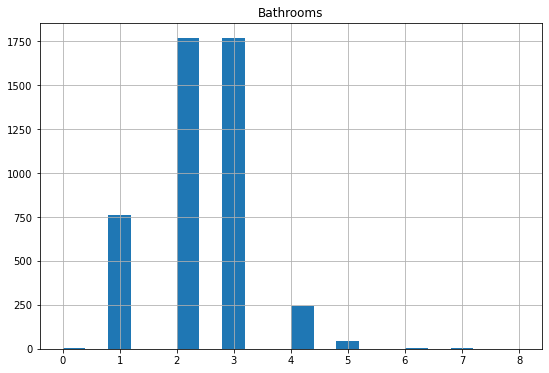

In [149]:
df.hist(column = "Bathrooms",figsize=(9,6),bins=20)

<AxesSubplot:>

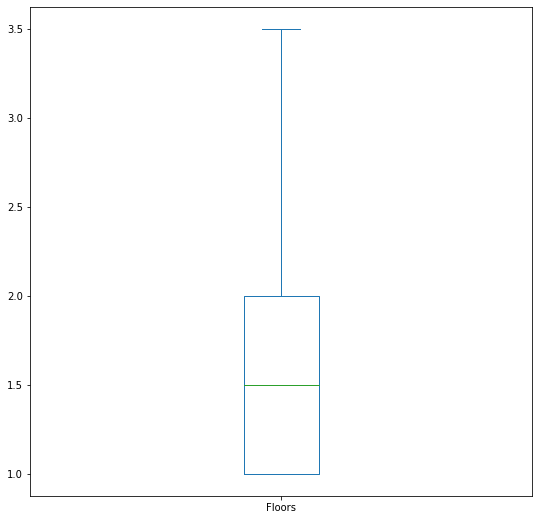

In [150]:
df["Floors"].plot(kind="box",figsize=(9,9))

In [151]:
index = np.where(df["Floors"] == max(df["Floors"]) )

df.loc[index]

,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,City,Statezip,Country
2364,12/6/2014,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,Seattle,WA 98102,USA
3397,25/6/2014,563500.0,3,3,1400,1312,3.5,0,0,3,1400,0,2007,0,Seattle,WA 98103,USA


In [152]:
df["Sqft_Lot"] = df["Sqft_Living"] + df["Sqft_Basement"]

In [153]:
most_Sqft_Lot = np.where(df["Sqft_Lot"] == max(df["Sqft_Lot"]))

df.loc[most_Sqft_Lot]

,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,City,Statezip,Country
122,5/5/2014,2280000.0,7,8,13540,17670,3.0,0,4,3,9410,4130,1999,0,Redmond,WA 98053,USA


In [154]:
df

,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,City,Statezip,Country
0,2/5/2014,3.130000e+05,3,2,1340,1340,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2/5/2014,2.384000e+06,5,3,3650,3930,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,2/5/2014,3.420000e+05,3,2,1930,1930,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,2/5/2014,4.200000e+05,3,2,2000,3000,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,2/5/2014,5.500000e+05,4,3,1940,2740,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,9/7/2014,3.081667e+05,3,2,1510,1510,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,USA
4595,9/7/2014,5.343333e+05,3,3,1460,1460,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,USA
4596,9/7/2014,4.169042e+05,3,3,3010,3010,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,USA
4597,10/7/2014,2.034000e+05,4,2,2090,3110,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,USA


In [155]:
del df["Date"]

In [156]:
del df["City"]

In [157]:
del df["Statezip"]

In [159]:
del df["Country"]

In [160]:
df

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated
0,3.130000e+05,3,2,1340,1340,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5,3,3650,3930,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3,2,1930,1930,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3,2,2000,3000,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4,3,1940,2740,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,3.081667e+05,3,2,1510,1510,1.0,0,0,4,1510,0,1954,1979
4595,5.343333e+05,3,3,1460,1460,2.0,0,0,3,1460,0,1983,2009
4596,4.169042e+05,3,3,3010,3010,2.0,0,0,3,3010,0,2009,0
4597,2.034000e+05,4,2,2090,3110,1.0,0,0,3,1070,1020,1974,0


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [162]:
df.head()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated
0,313000.0,3,2,1340,1340,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5,3,3650,3930,2.0,0,4,5,3370,280,1921,0
2,342000.0,3,2,1930,1930,1.0,0,0,4,1930,0,1966,0
3,420000.0,3,2,2000,3000,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4,3,1940,2740,1.0,0,0,4,1140,800,1976,1992


In [163]:
df.info

<bound method DataFrame.info of              Price Bedrooms  Bathrooms  Sqft_Living  Sqft_Lot  Floors  \
0     3.130000e+05        3          2         1340      1340     1.5   
1     2.384000e+06        5          3         3650      3930     2.0   
2     3.420000e+05        3          2         1930      1930     1.0   
3     4.200000e+05        3          2         2000      3000     1.0   
4     5.500000e+05        4          3         1940      2740     1.0   
...            ...      ...        ...          ...       ...     ...   
4594  3.081667e+05        3          2         1510      1510     1.0   
4595  5.343333e+05        3          3         1460      1460     2.0   
4596  4.169042e+05        3          3         3010      3010     2.0   
4597  2.034000e+05        4          2         2090      3110     1.0   
4598  2.206000e+05        3          3         1490      1490     2.0   

      Waterfront  View  Condition  Sqft_Above  Sqft_Basement  Yr_Built  \
0              0 

In [164]:
df.isnull().sum()

Price            0
Bedrooms         0
Bathrooms        0
Sqft_Living      0
Sqft_Lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Sqft_Above       0
Sqft_Basement    0
Yr_Built         0
Yr_Renovated     0
dtype: int64

In [165]:
print(df.Price.value_counts())
print(df.Condition.value_counts())
print(df.View.value_counts())

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: Price, Length: 1741, dtype: int64
3    2874
4    1252
5     435
2      32
1       6
Name: Condition, dtype: int64
0    4140
2     205
3     115
4      70
1      69
Name: View, dtype: int64


In [166]:
X = df.drop(['Floors','Bedrooms','Bathrooms'],axis=1)
Y = df['Condition']

In [167]:
print (X)

             Price  Sqft_Living  Sqft_Lot  Waterfront  View  Condition  \
0     3.130000e+05         1340      1340           0     0          3   
1     2.384000e+06         3650      3930           0     4          5   
2     3.420000e+05         1930      1930           0     0          4   
3     4.200000e+05         2000      3000           0     0          4   
4     5.500000e+05         1940      2740           0     0          4   
...            ...          ...       ...         ...   ...        ...   
4594  3.081667e+05         1510      1510           0     0          4   
4595  5.343333e+05         1460      1460           0     0          3   
4596  4.169042e+05         3010      3010           0     0          3   
4597  2.034000e+05         2090      3110           0     0          3   
4598  2.206000e+05         1490      1490           0     0          4   

      Sqft_Above  Sqft_Basement  Yr_Built  Yr_Renovated  
0           1340              0      1955          20

In [168]:
print (Y)

0       3
1       5
2       4
3       4
4       4
       ..
4594    4
4595    3
4596    3
4597    3
4598    4
Name: Condition, Length: 4599, dtype: int64


Splitting Training and Test data

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

Linear Regression

In [179]:
lin_reg_model = LinearRegression()

In [180]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [181]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

Model Evaluation

In [182]:
training_data_prediction = lin_reg_model.predict(X_train)

In [183]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  1.0


Visualize the actual prices and Prdicted prices

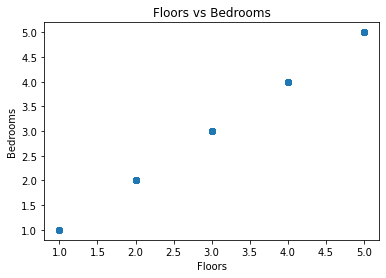

In [184]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show() 

In [185]:
training_data_prediction = lin_reg_model.predict(X_test)

In [186]:
error_score = metrics.r2_score(Y_test, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  1.0


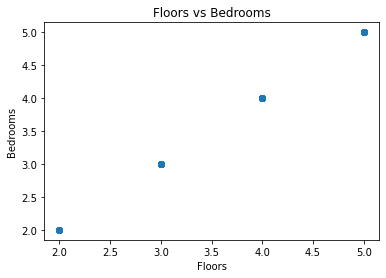

In [187]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show()

Lasso Regression

In [188]:
lass_reg_model = Lasso()

In [189]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [190]:
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(normalize=False)

Model Evaluation

In [191]:
training_data_prediction = lass_reg_model.predict(X_train)

In [192]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.28730901374075857


Visualize the actual prices and Prdicted prices

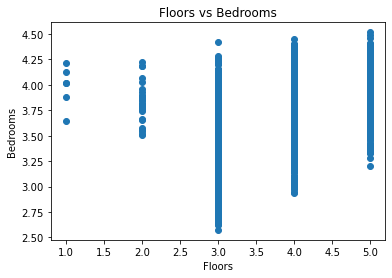

In [193]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show()

In [194]:
test_data_prediction = lass_reg_model.predict(X_test)

In [195]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.2838849897350161


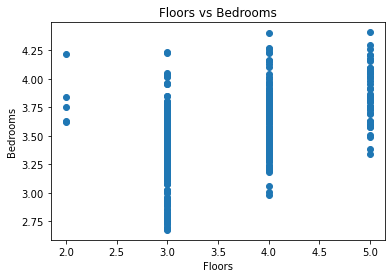

In [196]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show()

Polynomial Regression

In [197]:
from sklearn.metrics import mean_squared_error

In [198]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [200]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [201]:
from sklearn.metrics import r2_score

In [203]:
y_pred = poly_reg.predict(X_test_poly)
r2 = r2_score(Y_test, y_pred)

In [204]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [206]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

LinearRegression()

In [207]:
from sklearn.metrics import mean_squared_error

In [208]:
import numpy as np

In [210]:
y_pred = poly_reg.predict(X_test_poly)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

In [213]:
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ",error_score)

R squared Error :  0.9994942046692895


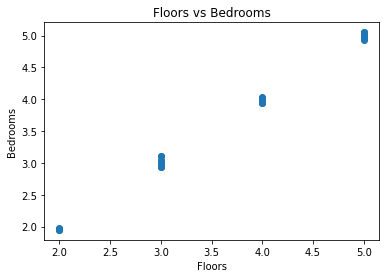

In [216]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show()

Decision Tree Regression

In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [221]:
# Define a list of hyperparameters to explore
max_depths = [None, 5, 10]  # Example: None (unrestricted), 5, and 10 as maximum depth

# Train Decision Tree Regression models with different configurations
for max_depth in max_depths:
    # Create the Decision Tree Regression model with the desired hyperparameters
    dt_reg = DecisionTreeRegressor(max_depth=max_depth)
    
    # Fit the model to the training data
    dt_reg.fit(X_train, Y_train)
    
    # Make predictions on the testing set
    y_pred = dt_reg.predict(X_test)
    
    # Calculate the squared error metrics
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Max Depth: {max_depth} | MSE: {mse:.2f} | RMSE: {rmse:.2f}")

Max Depth: None | MSE: 0.00 | RMSE: 0.00
Max Depth: 5 | MSE: 0.00 | RMSE: 0.00
Max Depth: 10 | MSE: 0.00 | RMSE: 0.00


In [223]:
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared Error : ",error_score)

R squared Error :  1.0


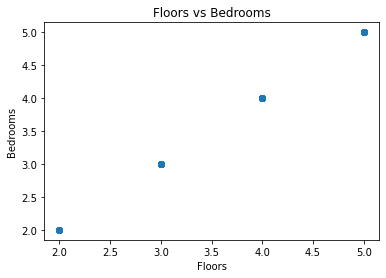

In [225]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Floors")
plt.ylabel("Bedrooms")
plt.title("Floors vs Bedrooms")
plt.show()